# Determining The Different Profiles of San Francisco Library Users

## Introduction:
The surge of COVID-19 in the country has resulted in many challenges in various library services and operations. In effect, public libraries are facing budget cuts which means they need to re-evaluate and re-assess their budget allocation to determine the priorities in terms of services, programs, and resources. Given this, it is important for them to seek methodologies to further understand their library users to efficiently deliver services. <br>

## Dataset: 
This project utilizes the datasets generated from the website of San Francisco City which can be
retrieved from data.sfgov.org (https://catalog.data.gov/dataset/library-usage).

## Problem Statement: 
1) What are the profiles of San Francisco Library users?

## Data Mining Algo: 
1) K-means Clustering <br>
2) Classification with SHAP (For Cluster Understanding)

## Business Value: 
Findings of this project will provide perspectives and insights that can yield the following benefits: <br>
1) Improved customer satisfaction score <br>
2) Increase in library usage <br>
3) Improved visibility of public library within the community <br>


<a id='back-to-top'></a>
## CONTENT SUMMARY
1) [Importing the libraries](#import-lib) <br>
2) [Loading the data](#read-file) <br>
3) [Initial EDA + Initial Pre-processing](#eda-preprocess) <br>
4) [AutoViz](#autoviz) <br>
5) [Data Transformation](#data-transform) <br>
6) [Clustering](#clustering) <br>
7) [Understanding the Clusters](#understand-cluster) <br>
8) [Conclusion](#conclusion) <br>

<a id='import-lib'></a>
### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import kneed

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
#from sklearn import metrics
from yellowbrick.cluster import silhouette_visualizer
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import shap
#import pycaret

<a id='read-file'></a>
### Loading the data
[Back to top](#back-to-top) <br>

In [2]:
df = pd.read_csv('Project1_Library_Usage.csv')

<a id='eda-preprocess'></a>
### Initial EDA + Initial Data Pre-processing
Data needs to undergo iterations of pre-processing and EDA. As such, the following shall be implemented:

1. Getting the list of columns and the original shape of dataframe
2. Describing the statistical summary of numeric columns 
3. Checking for columns with unique values
4. Checking for NA and NAN values
5. Removing BLANK Rows, REDUNDANT and UNUSABLE Columns
6. Changing data types
7. Treating columns with ordinal values

[Back to top](#back-to-top) <br>

In [3]:
df.columns

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Outside of County', 'Supervisor District'],
      dtype='object')

In [4]:
df.shape #give the rows and columns

(423448, 15)

In [5]:
df.describe()

,Patron Type Code,Total Checkouts,Total Renewals,Year Patron Registered,Supervisor District
count,423448.000000,423448.000000,423448.000000,423448.000000,313138.000000
mean,1.036765,161.982097,59.657327,2010.348917,6.288240
std,4.188198,453.703678,225.009917,4.357374,3.123634
min,0.000000,0.000000,0.000000,2003.000000,1.000000
25%,0.000000,2.000000,0.000000,2007.000000,4.000000
50%,0.000000,19.000000,2.000000,2012.000000,6.000000
75%,1.000000,113.000000,27.000000,2014.000000,9.000000
max,104.000000,35907.000000,8965.000000,2016.000000,11.000000


In [6]:
df['Supervisor District'].value_counts(dropna=False)

NaN     110310
4.0      32401
10.0     32268
9.0      31677
8.0      30732
7.0      30670
11.0     30436
5.0      28356
1.0      26787
6.0      26507
3.0      22151
2.0      21153
Name: Supervisor District, dtype: int64

In [7]:
list(df.columns)

['Patron Type Code',
 'Patron Type Definition',
 'Total Checkouts',
 'Total Renewals',
 'Age Range',
 'Home Library Code',
 'Home Library Definition',
 'Circulation Active Month',
 'Circulation Active Year',
 'Notice Preference Code',
 'Notice Preference Definition',
 'Provided Email Address',
 'Year Patron Registered',
 'Outside of County',
 'Supervisor District']

In [8]:
df.nunique() == 0

Patron Type Code                False
Patron Type Definition          False
Total Checkouts                 False
Total Renewals                  False
Age Range                       False
Home Library Code               False
Home Library Definition         False
Circulation Active Month        False
Circulation Active Year         False
Notice Preference Code          False
Notice Preference Definition    False
Provided Email Address          False
Year Patron Registered          False
Outside of County               False
Supervisor District             False
dtype: bool

In [9]:
df.info()
#df.notnull().sum()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      423448 non-null  object 
 8   Circulation Active Year       423448 non-null  object 
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

In [10]:
#CHECKING FOR NA/NAN VALUES
for col in df:
    print(col)
    print(df[col].value_counts(dropna=False),end="\n")

Patron Type Code
0      272251
1       59208
3       41619
2       28816
4       14931
15       1782
16       1744
9         977
5         862
10        415
100       349
55        157
12         95
103        66
101        47
104        45
102        44
8          40
Name: Patron Type Code, dtype: int64
Patron Type Definition
ADULT                  272251
JUVENILE                59208
SENIOR                  41619
YOUNG ADULT             28816
WELCOME                 14931
TEACHER CARD             1782
DIGITAL ACCESS CARD      1744
SPECIAL                   977
STAFF                     862
VISITOR                   415
AT USER ADULT             349
RETIRED STAFF             157
BOOKS BY MAIL              95
AT USER SENIOR             66
AT USER JUVENILE           47
AT USER WELCOME            45
AT USER TEEN               44
FRIENDS FOR LIFE           40
Name: Patron Type Definition, dtype: int64
Total Checkouts
0       73578
1       23482
2       15924
3       12926
4       10697
  

In [11]:
#MANAGING Very Similar Entries
df.loc[df['Patron Type Definition']=='AT USER ADULT','Patron Type Definition'] = 'ADULT'
df.loc[df['Patron Type Definition']=='AT USER SENIOR','Patron Type Definition'] = 'SENIOR'
df.loc[df['Patron Type Definition']=='AT USER JUVENILE','Patron Type Definition'] = 'JUVENILE'
df.loc[df['Patron Type Definition']=='AT USER WELCOME','Patron Type Definition'] = 'WELCOME'
df.loc[df['Patron Type Definition']=='AT USER TEEN','Patron Type Definition'] = 'TEEN'

In [12]:
#REMOVING REDUNDANT, BLANK Rows, and UNUSABLE Columns
df = df.drop(columns=['Patron Type Code','Home Library Code','Notice Preference Code'])
df = df.drop(columns=['Supervisor District'])
df = df.loc[(df['Circulation Active Month']!= 'None')&(df['Circulation Active Year']!= 'None')&(pd.notnull(df['Age Range']))]

In [13]:
df['Patron Type Definition'].unique()

array(['ADULT', 'SENIOR', 'WELCOME', 'TEACHER CARD', 'JUVENILE',
       'YOUNG ADULT', 'STAFF', 'SPECIAL', 'DIGITAL ACCESS CARD',
       'RETIRED STAFF', 'VISITOR', 'BOOKS BY MAIL', 'FRIENDS FOR LIFE',
       'TEEN'], dtype=object)

In [14]:
#Changing the data types of Boolean Variables to Object
#Changing the data types of Circulation Active Year to Numeric (since the NANs have been removed)

df['Provided Email Address'] = df['Provided Email Address'].astype('object')
df['Outside of County'] = df['Outside of County'].astype('object')
df['Circulation Active Year'] = df['Circulation Active Year'].astype('int64')

In [15]:
# ORDINAL VALUES
df['Years Registered'] = 0
df.loc[(df['Year Patron Registered']>=2013)&(df['Year Patron Registered']<=2016),'Years Registered'] = 3 #'Less than 5 years registered'
df.loc[(df['Year Patron Registered']>=2008)&(df['Year Patron Registered']<=2012),'Years Registered'] = 2 #'5 to 9 years registered'
df.loc[(df['Year Patron Registered']<2008),'Years Registered'] = 1 #'More than 9 years registered'

Age_Range_dict = {'0 to 9 years': 1,'10 to 19 years': 2,'20 to 24 years': 3,'25 to 34 years': 4,'35 to 44 years': 5,'45 to 54 years': 6,'55 to 59 years': 7, '60 to 64 years': 8,'65 to 74 years': 9,'75 years and over':10}
df['Age Range_Ordinal'] = df['Age Range'].map(Age_Range_dict)

df = df.drop(columns=['Year Patron Registered','Age Range'])

In [16]:
df['Years Registered'] = df['Years Registered'].astype('int64')

<a id='autoviz'></a>
### Autoviz
[Back to top](#back-to-top) <br>

In [17]:
sweet_report = sv.analyze(df)
#Saving results to HTML file
sweet_report.show_html('Group5_sweet_report_v4.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Group5_sweet_report_v4.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<a id='data-transform'></a>
### Data Transformation
After the data has completed the pre-processing and EDA stage, the following data transformation will be performed:

1. Encoding Categorical Variables 
2. Feature Scaling

[Back to top](#back-to-top) <br>

In [18]:
#COPYING ORIGINAL VALUES BEFORE TRANSFORMATIONS
df_orig = df.copy()
df_orig.reset_index(drop=True, inplace=True)
df_orig

,Patron Type Definition,Total Checkouts,Total Renewals,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Outside of County,Years Registered,Age Range_Ordinal
0,ADULT,31,22,Sunset,April,2016,email,True,False,2,4
1,ADULT,126,11,Marina,January,2016,email,True,False,1,6
2,ADULT,3002,1689,Portola,July,2016,phone,True,False,1,4
3,ADULT,4,0,Chinatown,July,2014,phone,True,False,3,4
4,ADULT,20,0,Sunset,June,2015,email,True,False,2,4
...,...,...,...,...,...,...,...,...,...,...,...
355410,YOUNG ADULT,608,364,Sunset,July,2016,email,True,False,1,2
355411,ADULT,291,13,Portola,March,2015,phone,False,False,2,2
355412,ADULT,15,11,Mission Bay,July,2016,email,True,False,3,8
355413,STAFF,208,58,Bernal Heights,July,2016,email,True,False,3,1


In [19]:
categorical = df.select_dtypes(include=['object'])
categorical_cols = list(categorical.columns)
categorical.shape

(355415, 6)

In [20]:
for col in categorical:
    print(col)
    print(df[col].unique(),end="\n")

Patron Type Definition
['ADULT' 'SENIOR' 'WELCOME' 'TEACHER CARD' 'JUVENILE' 'YOUNG ADULT'
 'STAFF' 'SPECIAL' 'DIGITAL ACCESS CARD' 'RETIRED STAFF' 'VISITOR'
 'BOOKS BY MAIL' 'FRIENDS FOR LIFE' 'TEEN']
Home Library Definition
['Sunset' 'Marina' 'Portola' 'Chinatown' 'Anza' 'Mission' 'Parkside'
 'Main Library' 'North Beach' 'Ortega' 'Park' 'Merced' 'Richmond'
 'Unknown' 'Presidio' 'Excelsior' 'Ingleside' 'Mission Bay' 'Potrero'
 'West Portal' 'Glen Park' 'Visitacion Valley' 'Bernal Heights'
 'Bayview/Linda Brooks-Burton' 'Western Addition' 'Noe Valley/Sally Brunn'
 'Eureka Valley/Harvey Milk Memorial' 'Ocean View' 'Golden Gate Valley'
 'Library on Wheels' "Children's Bookmobile"
 'Branch Bookmobile (West Portal)' 'Branch Bookmobile (Excelsior)'
 'Branch Bookmobile (Marina)' 'Branch Bookmobile (Sunset)']
Circulation Active Month
['April' 'January' 'July' 'June' 'May' 'February' 'August' 'October'
 'March' 'December' 'September' 'November']
Notice Preference Definition
['email' 'phone' 'p

In [21]:
# Treating Categorical Variables
#dummies = pd.get_dummies(df, columns=categorical, drop_first=True)
#embarked_dummies = pd.get_dummies(df., prefix='Embarked')
#df3 = df.copy()
df = pd.get_dummies(df, columns=categorical_cols)

In [22]:
df

,Total Checkouts,Total Renewals,Circulation Active Year,Years Registered,Age Range_Ordinal,Patron Type Definition_ADULT,Patron Type Definition_BOOKS BY MAIL,Patron Type Definition_DIGITAL ACCESS CARD,Patron Type Definition_FRIENDS FOR LIFE,Patron Type Definition_JUVENILE,...,Circulation Active Month_October,Circulation Active Month_September,Notice Preference Definition_email,Notice Preference Definition_none,Notice Preference Definition_phone,Notice Preference Definition_print,Provided Email Address_False,Provided Email Address_True,Outside of County_False,Outside of County_True
1,31,22,2016,2,4,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,126,11,2016,1,6,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
6,3002,1689,2016,1,4,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
7,4,0,2014,3,4,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
8,20,0,2015,2,4,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423442,608,364,2016,1,2,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
423443,291,13,2015,2,2,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
423444,15,11,2016,3,8,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
423445,208,58,2016,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [23]:
df.dtypes

Total Checkouts                       int64
Total Renewals                        int64
Circulation Active Year               int64
Years Registered                      int64
Age Range_Ordinal                     int64
                                      ...  
Notice Preference Definition_print    uint8
Provided Email Address_False          uint8
Provided Email Address_True           uint8
Outside of County_False               uint8
Outside of County_True                uint8
Length: 74, dtype: object

In [24]:
numerical = df.select_dtypes(include=['int32','int64','float64','uint8'])
numerical_cols = list(numerical.columns)
numerical.shape

(355415, 74)

In [25]:
#for col in numerical:
#    print(df[col].unique(),end="\n")

In [26]:
#FEATURE SCALING
normalize = MinMaxScaler()
standardize = StandardScaler()

numerical_scaled = normalize.fit_transform(numerical)
#numerical_scaled = standardize.fit_transform(numerical)

#df_standardized = pd.DataFrame(numerical_scaled, columns=[numerical_cols])
#df_normalized = normalize.fit_transform(df_standardized)
#df_normalized = pd.DataFrame(numerical_scaled, columns=[numerical_cols])

#TRANSFORMED DATASET
df_transformed = pd.DataFrame(numerical_scaled, columns=[numerical_cols])

In [27]:
df_transformed

,Total Checkouts,Total Renewals,Circulation Active Year,Years Registered,Age Range_Ordinal,Patron Type Definition_ADULT,Patron Type Definition_BOOKS BY MAIL,Patron Type Definition_DIGITAL ACCESS CARD,Patron Type Definition_FRIENDS FOR LIFE,Patron Type Definition_JUVENILE,...,Circulation Active Month_October,Circulation Active Month_September,Notice Preference Definition_email,Notice Preference Definition_none,Notice Preference Definition_phone,Notice Preference Definition_print,Provided Email Address_False,Provided Email Address_True,Outside of County_False,Outside of County_True
0,0.000863,0.002454,1.000000,0.5,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.003509,0.001227,1.000000,0.0,0.555556,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.083605,0.188399,1.000000,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.000111,0.000000,0.846154,1.0,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.000557,0.000000,0.923077,0.5,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355410,0.016933,0.040602,1.000000,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
355411,0.008104,0.001450,0.923077,0.5,0.111111,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
355412,0.000418,0.001227,1.000000,1.0,0.777778,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
355413,0.005793,0.006470,1.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
#df_transformed.to_excel('DataMining_DataCleanup.xlsx',index=False)

<a id='clustering'></a>
### Clustering
[Back to top](#back-to-top) <br>

In [30]:
X = df_transformed.copy()

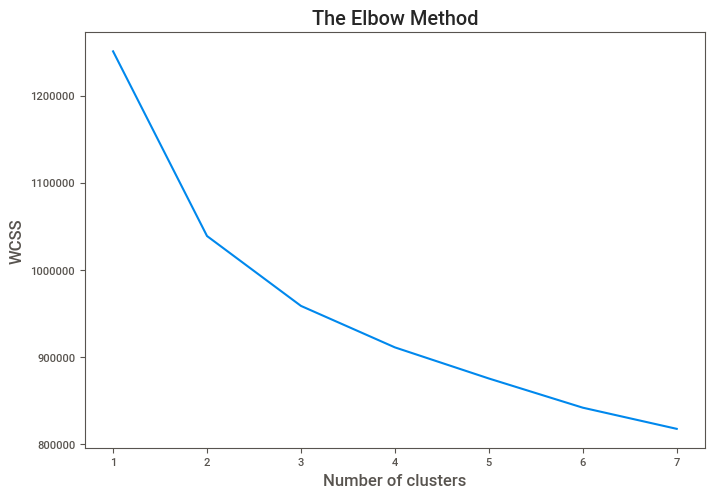

In [31]:
#Finding Optimal k using Elbow Method
wcss = []
for i in range(1,8):
    #kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=4,random_state=0)
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
#Finding Optimal k using Kneed
from kneed import KneeLocator
def find_k(df, increment=0, decrement=0):
    """Find the optimum k clusters"""
    sse = {}
    
    for k in range(1, 8):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(df)
        sse[k] = kmeans.inertia_
    
    kn = KneeLocator(x=list(sse.keys()), 
                 y=list(sse.values()), 
                 curve='convex', 
                 direction='decreasing')
    k = kn.knee + increment - decrement
    return k

find_k(X)

3

Thus, the optimal value of k is 3.

In [33]:
def K_Means(X, n):
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X)
    model = KMeans(n)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [34]:
clust_labels, cent = K_Means(X, 3)
X['kmeans'] = clust_labels
df_orig.insert((df_orig.shape[1]),'kmeans',clust_labels)

In [35]:
#X.to_excel('DataMining_CLUSTERS.xlsx',index=False)
#df_orig.to_excel('DataMining_Original_Data_CLUSTERS.xlsx',index=False)

In [ ]:
#X.to_csv('DataMining_CLUSTERS.csv',index=False)

<a id='understand-cluster'></a>
### Understanding the Clusters
[Back to top](#back-to-top) <br>

In [36]:
Clusters = pd.read_csv('DataMining_CLUSTERS.csv')

In [37]:
Clusters


,Total Checkouts,Total Renewals,Circulation Active Year,Years Registered,Age Range_Ordinal,Patron Type Definition_ADULT,Patron Type Definition_BOOKS BY MAIL,Patron Type Definition_DIGITAL ACCESS CARD,Patron Type Definition_FRIENDS FOR LIFE,Patron Type Definition_JUVENILE,...,Circulation Active Month_September,Notice Preference Definition_email,Notice Preference Definition_none,Notice Preference Definition_phone,Notice Preference Definition_print,Provided Email Address_False,Provided Email Address_True,Outside of County_False,Outside of County_True,kmeans
0,0.000863,0.002454,1.000000,0.5,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.003509,0.001227,1.000000,0.0,0.555556,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
2,0.083605,0.188399,1.000000,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
3,0.000111,0.000000,0.846154,1.0,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
4,0.000557,0.000000,0.923077,0.5,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355410,0.016933,0.040602,1.000000,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
355411,0.008104,0.001450,0.923077,0.5,0.111111,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
355412,0.000418,0.001227,1.000000,1.0,0.777778,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
355413,0.005793,0.006470,1.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [38]:
Clusters['kmeans'].value_counts(dropna=False)

1    193206
0     86026
2     76183
Name: kmeans, dtype: int64

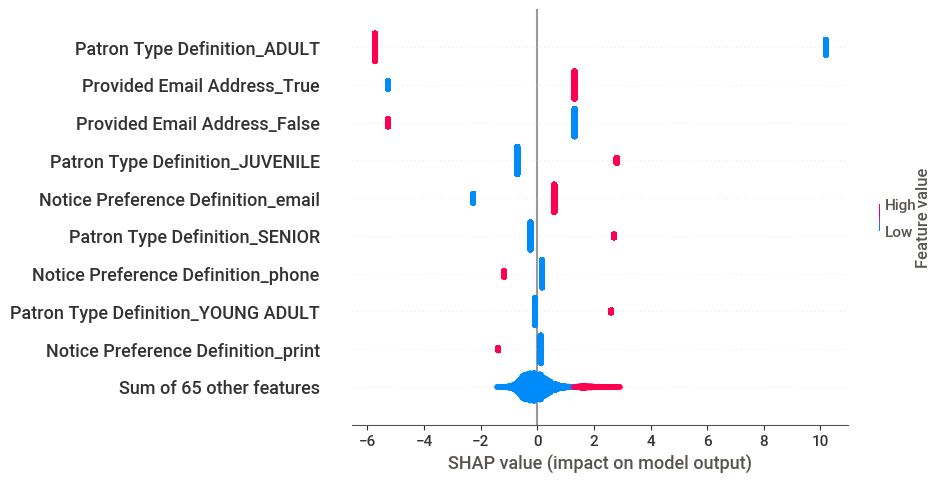

In [41]:
## CLUSTER1 - THE NON ADULTS THAT PREFERS EMAILS
cluster1 = Clusters.copy()
cluster1['Cluster'] = cluster1['kmeans'].apply(lambda x: 1 if x==0 else 0)
cluster1 = cluster1.drop(columns=['kmeans'])
X1 = cluster1.drop(["Cluster"], axis=1)
y1 = cluster1["Cluster"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2,random_state=42,stratify=y1)
masker1 = shap.maskers.Independent(data = X_test1)
LR = LogisticRegression()
model1 = LR.fit(X_train1, y_train1)

#For Interpretation of Cluster 1
explainer = shap.LinearExplainer(model1, masker=masker1)
shap_values1 = explainer(X_test1)
shap.plots.beeswarm(shap_values1)

#Metrics Calculation (if needed)
# prediction1 = model1.predict(X_test1)
# cf1 = confusion_matrix(y_test1, prediction1)
# precision1 = precision_score(y_test1, prediction1)*100
# recall1 = recall_score(y_test1, prediction1)*100
# f1_score1 = f1_score(y_test1, prediction1)*100
# model1_metrics = pd.DataFrame(
#     {'train_acc': model1.score(X_train1, y_train1)*100,
#      'test_acc': model1.score(X_test1, y_test1)*100,
#      'precision': precision1,
#      'recall': recall1,
#      'f1': f1_score1
#     },index=['Cluster 1 Model Metrics']).transpose()

# model1_metrics

In [ ]:
#Visualization
# import seaborn as sns
# import matplotlib.pyplot as plt

# ax = sns.heatmap(cf1,fmt="d", annot=True, cmap='Blues')
# #ax.set_title(s);
# ax.set_xlabel('\nPredicted')
# ax.set_ylabel('Actual ')
# ax.xaxis.set_ticklabels(['Cluster 1', 'Not Cluster 1'])
# ax.yaxis.set_ticklabels(['Cluster 1', 'Not Cluster 1'])
# plt.show()

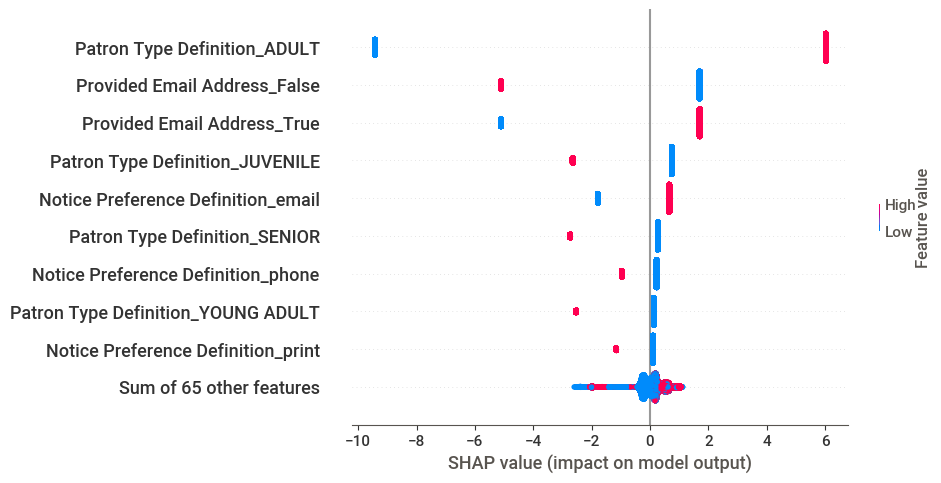

In [43]:
## CLUSTER2 - THE ADULT USERS THAT PREFERS EMAILS
cluster2 = Clusters.copy()
cluster2['Cluster'] = cluster2['kmeans'].apply(lambda x: 1 if x==1 else 0)
cluster2 = cluster2.drop(columns=['kmeans'])
X2 = cluster2.drop(["Cluster"], axis=1)
y2 = cluster2["Cluster"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2,random_state=42,stratify=y2)
masker2 = shap.maskers.Independent(data = X_test2)
LR = LogisticRegression()
model2 = LR.fit(X_train2, y_train2) 

#For Interpretation of Cluster 2
explainer = shap.LinearExplainer(model2, masker=masker2)
shap_values2 = explainer(X_test2)
shap.plots.beeswarm(shap_values2)

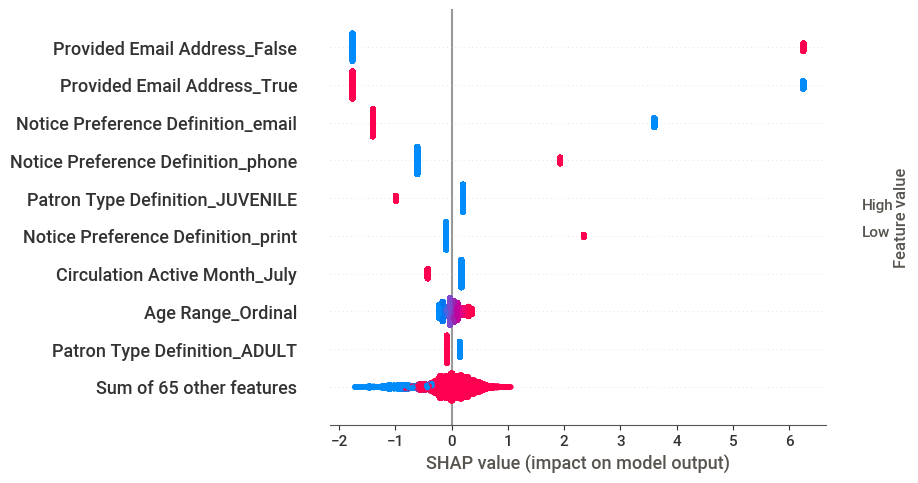

In [44]:
## CLUSTER3 - THE TRADITIONAL USERS - DOES NOT PREFER EMAILS AND PREFERS PRINT AND PHONE NOTIFICATIONS
cluster3 = Clusters.copy()
cluster3['Cluster'] = cluster3['kmeans'].apply(lambda x: 1 if x==2 else 0)
cluster3 = cluster3.drop(columns=['kmeans'])
X3 = cluster3.drop(["Cluster"], axis=1)
y3 = cluster3["Cluster"]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2,random_state=42,stratify=y3)
masker3 = shap.maskers.Independent(data = X_test3)
LR = LogisticRegression()
model3 = LR.fit(X_train3, y_train3)

#For Interpretation of Cluster 3
explainer = shap.LinearExplainer(model3, masker=masker3)
shap_values3 = explainer(X_test3)
shap.plots.beeswarm(shap_values3)

<a id='conclusion'></a>
### Conclusion
[Back to top](#back-to-top) <br>

With all the steps mentioned above, the following can be concluded: <br>
1) There are 3 Different Profiles of San Francisco Library Users which are:
    - Cluster 1 (24.2%) : Non-Adults that prefer Digital Transactions
    - Cluster 2 (54.4%) : Adults that prefer Digital Transactions - electronic resources, library activities and outreach programs facilities, activate online transactions 
    - Cluster 3 (21.4%) : Traditional Users that prefers phones and prints


2) Almost **80%** of the Users prefer to transact digitally. This insight can then be factored in by the library in their budget allocation. <br>

3) In line with these findings, the following are recommended:
    - Retain Traditional services : There is still a signifcant portion of users that prefers to transact traditionally i.e., thru phones and prints. This can be revisited with the latest numbers (specially post-pandemic) before deciding to go fully digital.
    - Focus on Digital services : With the majority of users preferring digital transactions, the library should offer more and more digital services like webinars and also consider to allocate for cloud infrastructures. This also means that there is an opportunity for further Data Science related projects like Recommender systems.